In [1]:
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune

from functions.train_test import train, test,train_kd
from functions.data_loader import get_data_loader,load_checkpoint
from models.vit import ViT 
from functions.helpers import count_parameters


In [2]:
torch.manual_seed(42)

In [3]:
train_loader, test_loader = get_data_loader(
    80, 2, "datasets/cifar-100/cifar-100-python", download=True
)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
teacher_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4, #6
    heads=8, #6
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False
).to("cuda")

teacher_save_path = "save_model/cifar-100/vit_base"
teacher_load_path = f"{teacher_save_path}/best_model.pt"



student_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False

).to("cuda")
student_kd_save_path = "save_model/cifar-100/vit_student_kd"
student_kd_load_path = f"{student_kd_save_path}/best_model.pt"



In [ ]:
train(
    teacher_model,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    # save_path=teacher_save_path,
)

In [8]:
load_checkpoint(teacher_model,teacher_load_path)
test(teacher_model,test_loader,'cuda')
# load_checkpoint(student_kd,teacher_load_path)
# test(student_kd,test_loader,'cuda')

Test Accuracy: 54.01%


54.01

In [ ]:
student_featurekd_save_path='save_model/cifar-100/vit_featurekd'

Student base

In [ ]:
student_base = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False

).to("cuda")
student_base_save_path = "save_model/cifar-100/vit_student_base"

In [ ]:
train(
    student_base,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    # save_path=student_base_save_path,
)

Response based kd


Epoch 1/300, Loss: 3.9294233825683595
Current Learning Rate: 0.000999972584682756
accuracy: 12.5%
Test Accuracy: 9.45%
max_test_accuracy : 9.45
Epoch 2/300, Loss: 3.4148425148010255
Current Learning Rate: 0.0009998903417374227
accuracy: 15.0%
Test Accuracy: 13.94%
max_test_accuracy : 13.94
Epoch 3/300, Loss: 3.1918837074279787
Current Learning Rate: 0.0009997532801828658
accuracy: 18.75%
Test Accuracy: 17.56%
max_test_accuracy : 17.56
Epoch 4/300, Loss: 3.0545293869018555
Current Learning Rate: 0.0009995614150494292
accuracy: 11.25%
Test Accuracy: 20.55%
max_test_accuracy : 20.55
Epoch 5/300, Loss: 2.9652776371002196
Current Learning Rate: 0.000999314767377287
accuracy: 28.75%
Test Accuracy: 22.00%
max_test_accuracy : 22.0
Epoch 6/300, Loss: 2.8910564044952394
Current Learning Rate: 0.0009990133642141358
accuracy: 21.25%
Test Accuracy: 22.34%
max_test_accuracy : 22.34
Epoch 7/300, Loss: 2.824036378479004
Current Learning Rate: 0.000998657238612229
accuracy: 17.5%
Test Accuracy: 23.88%


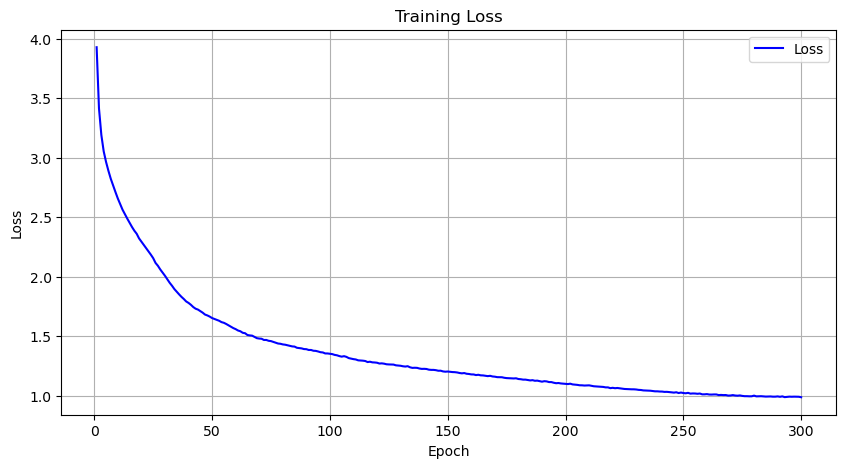

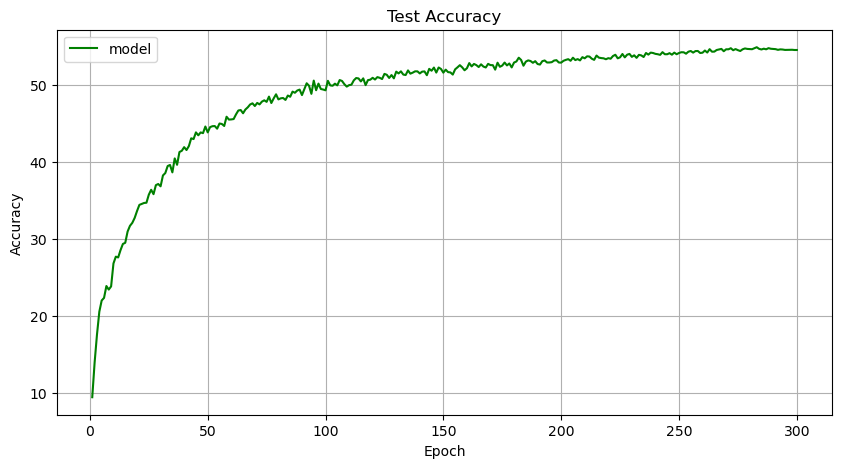

In [9]:

train_kd(
    student_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=4,
    alpha=0.2,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='response',
    # save_path=student_kd_save_path,
    load_path_teacher=teacher_load_path,
)

Feature kd


In [4]:
feature_student_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True

).to("cuda")
feature_student_kd_save_path = "save_model/cifar-100/vit_student_feature_kd"
feature_student_kd_load_path = f"{feature_student_kd_save_path}/best_model.pt"

teacher_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True
).to("cuda")

teacher_save_path = "save_model/cifar-100/vit_base"
teacher_load_path = f"{teacher_save_path}/best_model.pt"

Epoch 1/300, Loss: 3.3219386711120604
Current Learning Rate: 0.000999972584682756
accuracy: 7.5%
Test Accuracy: 9.95%
max_test_accuracy : 9.95
Epoch 2/300, Loss: 2.927445460128784
Current Learning Rate: 0.0009998903417374227
accuracy: 13.75%
Test Accuracy: 14.40%
max_test_accuracy : 14.4
Epoch 3/300, Loss: 2.7412150173187255
Current Learning Rate: 0.0009997532801828658
accuracy: 15.0%
Test Accuracy: 18.64%
max_test_accuracy : 18.64
Epoch 4/300, Loss: 2.6320319458007813
Current Learning Rate: 0.0009995614150494292
accuracy: 15.0%
Test Accuracy: 19.80%
max_test_accuracy : 19.8
Epoch 5/300, Loss: 2.555129525756836
Current Learning Rate: 0.000999314767377287
accuracy: 20.0%
Test Accuracy: 21.08%
max_test_accuracy : 21.08
Epoch 6/300, Loss: 2.492273894882202
Current Learning Rate: 0.0009990133642141358
accuracy: 23.75%
Test Accuracy: 23.10%
max_test_accuracy : 23.1
Epoch 7/300, Loss: 2.4496788673400878
Current Learning Rate: 0.000998657238612229
accuracy: 30.0%
Test Accuracy: 23.43%
max_tes

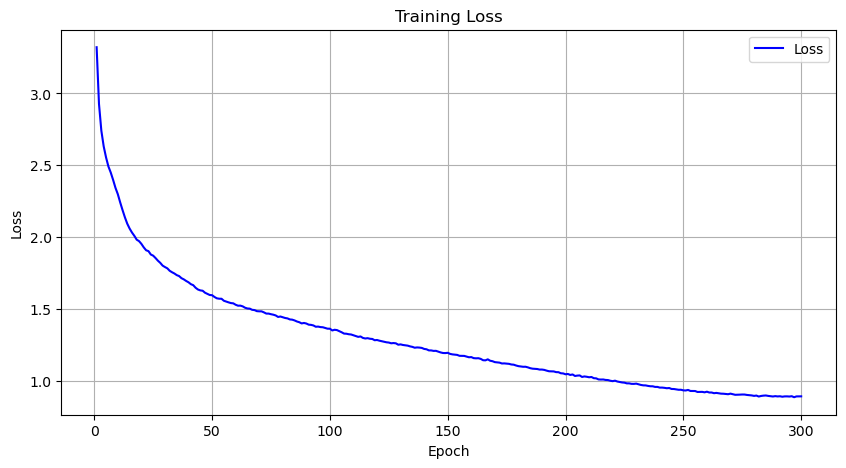

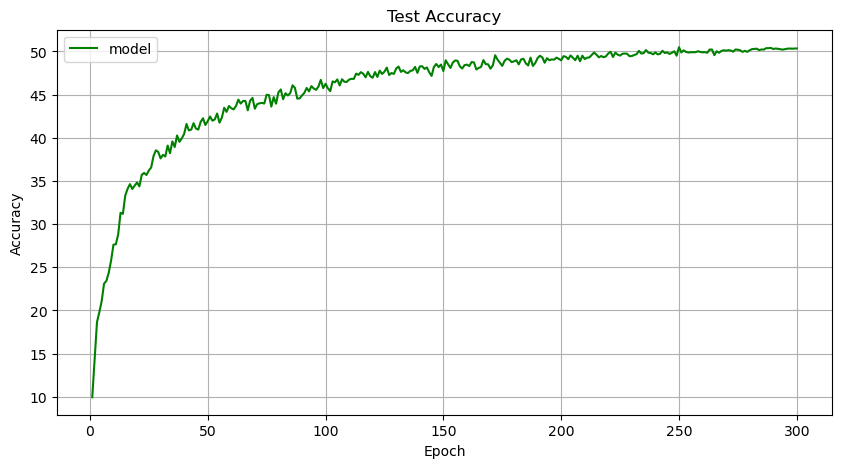

In [5]:
train_kd(
    feature_student_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=8,
    alpha=0.10,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='feature',
    save_path=feature_student_kd_save_path,
    load_path_teacher=teacher_load_path,
)

Combined kd

In [ ]:
print(f"Total number of parameters: {count_parameters(student_kd)}")

In [ ]:
student_combined_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True
).to("cuda")

student_combined_kd_save_path = "save_model/cifar-100/vit_student_combined_kd"

train_kd(
    student_combined_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=4,
    alpha=0.15,
    beta=0.15,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='combined',
    # save_path=student_combined_kd_save_path,
    load_path_teacher=teacher_load_path,
)

In [ ]:
load_checkpoint(student_kd,f"{student_kdsoft_save_path}/best_model.pt")

In [ ]:
test(student_kd,test_loader,'cuda')

In [ ]:
pruning_method = prune.L1Unstructured

In [ ]:
for name, module in teacher_model.named_modules():
    if isinstance(module, nn.Linear):
        prune.ln_structured(module, name='weight', amount=0.9, n=1, dim=0)
        print(module)


In [ ]:
teacher_model

In [ ]:
for name, layer in teacher_model.named_children():
    print(name)

In [ ]:
module = teacher_model.transformer.layers[0]

In [ ]:
for name, param in teacher_model.named_parameters():
    if "bias" in name:
        param= nn.Parameter(torch.sparse.FloatTensor(param.shape).to('cuda'))
        print(param)
    # else:
    #     print(param)


In [ ]:
for name, module in teacher_model.named_modules():
    print(module.transformer.layers[0][0].fn.to_qkv.weight)

In [ ]:
module

In [ ]:
attention = module[0].fn

In [ ]:
print(list(attention.named_parameters()))

In [ ]:
linear_layer = attention.to_qkv

In [ ]:
linear_layer

In [ ]:
prune.random_unstructured(linear_layer, name="weight", amount=0.3)

In [ ]:
teacher_model.transformer.layers[0][0].fn.to_qkv.weight